# Python for data science 
Author: Josiah Baker, Steve Mortimer  
Organization: Norfolk Data Science

# Getting started

* Install [Anaconda](https://www.continuum.io/downloads)
    - Anaconda is the go to "data science distribution" for python 
    - Comes pre-loaded with numpy, pandas, sklearn and others
    - Includes additional tools such as jupyter notebooks



## Mac OSX
If you have brew, go to terminal and run  

    brew cask install Caskroom/cask/anaconda
You might also need to add anaconda/bin to your `PATH` env variable  
This is in the `.bash_profile` file  

 - Open `~/.bash_profile` in your favorite text editor  
 <code data-trim data-noescape>vi ~/.bash_profile</code>    
 - Add the following line  
       export PATH=~/anaconda3/bin:"&#36;PATH"
 - Test your install by runningpython  
 
You should see something like

    Python 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12)   
If not, confirm that your `.bash_profile` has been updated and and restart terminal

## Windows
Head over to [https://www.continuum.io/downloads](https://www.continuum.io/downloads) and use the GUI downloader  
![GUI Installer](install_windows.png)

Run the executable and follow the instructions. We can also set a `PATH` variable to make python easier to use

## Windows cont.
* On XP, right click `My Computer -> Properties` and navigate to the `System Properties -> Advanced` tab
<img src="system_properties.png" alt="System properties" width="40%" style="float: right"/>
* Copy the following into the end of the `PATH` variable  
      ;%PYTHON_HOME%\;%PYTHON_HOME%\Scripts
* Test your install by opening a command prompt and running  
      C:\Users\Username>python
* On Windows 7 and up, search for "environment variables" and follow the same steps

# Getting additional packages
Anaconda comes with two ways to manage packages: `pip` and `conda`. Using these will..
* Insure your packages install correctly
* Allow you to easily upgrade and uninstall packages
* Manage dependencies when install

### Mac
    pip install <package>  
Or.. 

    conda install <package>  
### Windows
`pip` can also be used on Windows if you properly set up your `ENV` variable during installation. You can also run it from within `git bash` or `cygwin` if you have those installed.

# Running python scripts

Create your first hello world script and run with 

    python hello_world.py

# Using the qtconsole

Demonstrate how running code can be interactive, but with tab completion.. better than the python shell

# Jupyter notebooks

Running a notebook server, examples

# Reading data

1. Excel example
2. Adventureworks postgres example
3. API example



# Exploring data

1. Basic pandas functionality
2. inline plots


# Visualizing 

1. Seaborn example
2. Maybe bokeh, plotly?

Examples highlighting visualization tools available for python

# Analyzing data

1. sklearn on pandas example


# Collaborating 

1. Jupyter on github.com
2. output jupyter to html, script, slideshow

Demonstrate how the entire analysis can be contained in the notebook

In [1]:
for i in range(10):
    print i*i
    
print "Hi"

0
1
4
9
16
25
36
49
64
81
Hi


4.0


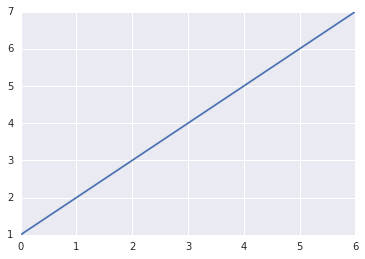

In [4]:
import pandas as pd
%matplotlib inline
import seaborn as sns

data = pd.Series([1,2,3,4,5,6,7])
data.plot();
print data.mean()
